<a href="https://colab.research.google.com/github/alevchencko/-2-8-/blob/main/%D0%A7%D0%9C_8_%D0%9B%D0%B5%D0%B2%D1%87%D0%B5%D0%BD%D0%BA%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Таблиця кінцевих різниць:
[[10.517 -0.324 -0.062  0.028  0.016 -0.    -0.001  0.002 -0.003  0.003
   0.    -0.009]
 [10.193 -0.386 -0.034  0.044  0.016 -0.001  0.001 -0.001 -0.     0.003
  -0.009  0.   ]
 [ 9.807 -0.42   0.01   0.06   0.015  0.     0.    -0.001  0.003 -0.006
   0.     0.   ]
 [ 9.387 -0.41   0.07   0.075  0.015  0.    -0.001  0.002 -0.003  0.
   0.     0.   ]
 [ 8.977 -0.34   0.145  0.09   0.015 -0.001  0.001 -0.001  0.     0.
   0.     0.   ]
 [ 8.637 -0.195  0.235  0.105  0.014  0.    -0.     0.     0.     0.
   0.     0.   ]
 [ 8.442  0.04   0.34   0.119  0.014  0.     0.     0.     0.     0.
   0.     0.   ]
 [ 8.482  0.38   0.459  0.133  0.014  0.     0.     0.     0.     0.
   0.     0.   ]
 [ 8.862  0.839  0.592  0.147  0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 9.701  1.431  0.739  0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [11.132  2.17   0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [13.302  0.     0.

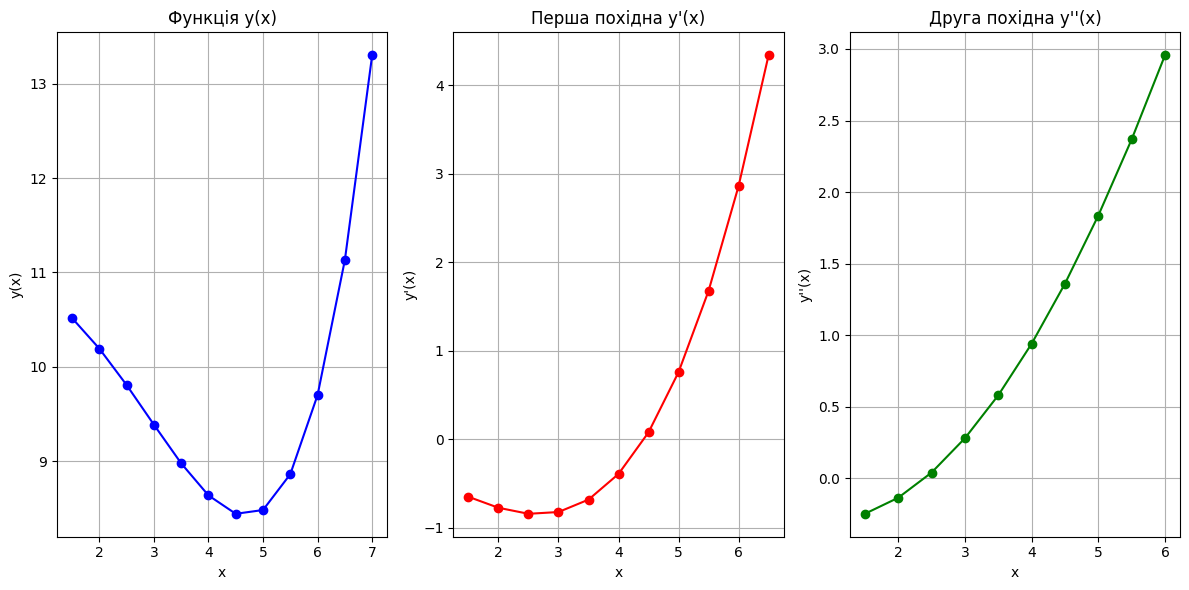

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# Таблиця значень функції
x_values = np.array([1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0])
y_values = np.array([10.517, 10.193, 9.807, 9.387, 8.977, 8.637, 8.442, 8.482, 8.862, 9.701, 11.132, 13.302])
# Крок таблиці
h = x_values[1] - x_values[0]
# Обчислення кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]
    return delta_y
# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y_values)
# Виводимо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)
# Значення кінцевих різниць для першої та другої похідних
delta_y1 = delta_table[4, 1]  # Δy1 для x = 3.5
delta2_y1 = delta_table[4, 2]  # Δ²y1 для x = 3.5
delta3_y1 = delta_table[4, 3]  # Δ³y1 для x = 3.5
delta4_y1 = delta_table[4, 4]  # Δ⁴y1 для x = 3.5
# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h
# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1  + 11 * delta4_y1 / 12) / h**2
# Обчислюємо першу та другу похідні в точці x = 3.5
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)
# Округляємо до точності 0.001
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)
# Виводимо результати
print(f"\nПерша похідна y'(3.5) ≈ {y1_prime}")
print(f"Друга похідна y''(3.5) ≈ {y1_double_prime}")
# Побудова графіків
x_plot = x_values
y_plot = y_values
# Графік для функції
plt.figure(figsize=(12, 6))
# Оригінальна функція y(x)
plt.subplot(1, 3, 1)
plt.plot(x_plot, y_plot, 'bo-', label='y(x)')
plt.title('Функція y(x)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)
# Перша похідна y'(x)
plt.subplot(1, 3, 2)
first_diff = np.diff(y_plot) / h
plt.plot(x_plot[:-1], first_diff, 'ro-', label="y'(x)")
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'(x)")
plt.grid(True)
# Друга похідна y''(x)
plt.subplot(1, 3, 3)
second_diff = np.diff(np.diff(y_plot)) / h**2
plt.plot(x_plot[:-2], second_diff, 'go-', label="y''(x)")
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''(x)")
plt.grid(True)
plt.tight_layout()
plt.show()